In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import plotly.express as px
import os, sys, glob

print('2024-11-12')

2024-11-12


In [13]:
print("sqlite3.connect('../../DATA/WEBscr.db')")

DB = sqlite3.connect('../../DATA/WEBscr.db')
C = DB.cursor()

#sql užklausa per pandas sql_query
sql="""select * from TAutos"""
dfautos = pd.read_sql_query(sql, con=DB)

#sql užklausa per pandas sql_query
sql="""select * from TUrl"""
dfurl = pd.read_sql_query(sql, con=DB)
dfurl.head()

C.close()
DB.close()

sqlite3.connect('../../DATA/WEBscr.db')


In [3]:
def getplpr(x:str) -> tuple[str, float]:
    *_, pl, pr = x.split(';')
    pl = pl.strip()
    if pr.count('€') > 1:
        p1, *_, p2 = pr.strip().split('\n')
        pr = float(p2.replace('€','').replace(' ',''))
    else:
        pr = float(pr.replace('€','').replace(' ',''))
    return pl, pr

places, places_short, prices = [], [], []
for f in dfurl['params'].values:
    p, r = getplpr(str(f))
    places_short.append(p[:4])
    places.append(p)
    prices.append(r)
    
df = dfurl[['id', 'params']]
df['PL'] = places
df['PLC'] = places_short
df['PR'] = prices

In [14]:
print("read_csv('../../DATA/atlyginimai.csv')")

dfa = pd.read_csv('../../DATA/atlyginimai.csv')
dfa = dfa[['Sav.', 'Bruto, EUR']]
dfa.columns = ['Sav', 'Eur']
dfa['Sav'] = dfa['Sav'].str[:4]
dfa.drop_duplicates(subset=['Sav'], inplace=True)
dfa['Eur'] = dfa['Eur'].str.replace(' ','').str.replace(',','.').str.replace('\xa0','').apply(float)

read_csv('../../DATA/atlyginimai.csv')


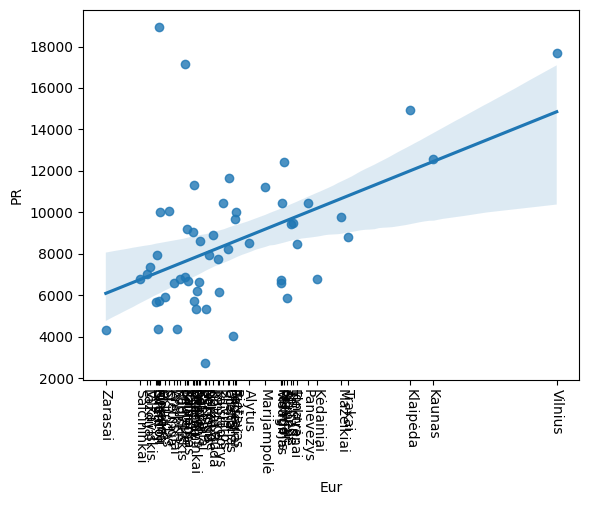

In [9]:
dfs = pd.merge(left=df, right=dfa, left_on='PLC', right_on='Sav')
dfgr = dfs.groupby('PL').mean(numeric_only=True).reset_index()
vs = dfgr[['PL', 'Eur']].sort_values(by='Eur')
ax = sns.regplot(data=dfgr, x='Eur',y='PR')
vs.head(1)
ax.set_xticks(vs['Eur'].values.tolist())
ax.set_xticklabels(vs['PL'].values.tolist())
ax.tick_params(axis='x', rotation=-90)
plt.show()

In [ ]:
dfgr.set_index('PL', inplace=True)
dfgr.head(5)

Koreliacija


,PR,Eur
PL,,
Akmenė,5888.727273,1758.8
Alytus,8523.221098,1685.4
Anykščiai,6621.039474,1537.7
Birštonas,11676.515152,1645.0
Biržai,5660.707547,1500.9


In [12]:
print('Koreliacija')

print(dfgr.corr(numeric_only=True,method='pearson')) # default
print()
print(dfgr.corr(numeric_only=True,method='spearman'))

Koreliacija
           PR       Eur
PR   1.000000  0.470622
Eur  0.470622  1.000000

          PR      Eur
PR   1.00000  0.40596
Eur  0.40596  1.00000
